# Desafio da Aula 4
- Buscar a ação da Apple e recriar o gráfico de Candlestick usando a biblioteca MPLFinance

Para isso iniciaremos importando as bibliotecas que serão utilizadas

In [54]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Agora precisamos baixar os dados da ação da apple que se chama AAPL

In [55]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166634,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


Então criamos o gráfico de candlestick utilizando a API mpl Finance, passando as 30 primeiras linhas do gráfico, o tipo que será o de candlestick o tamanho que queremos para o gráfico, colocamos como true o volume para ser criado um gráfico de volume, colocamos como mav as médias móveis de 7 e 14 dias e o estilo do gráfico que define as cores utilizadas.

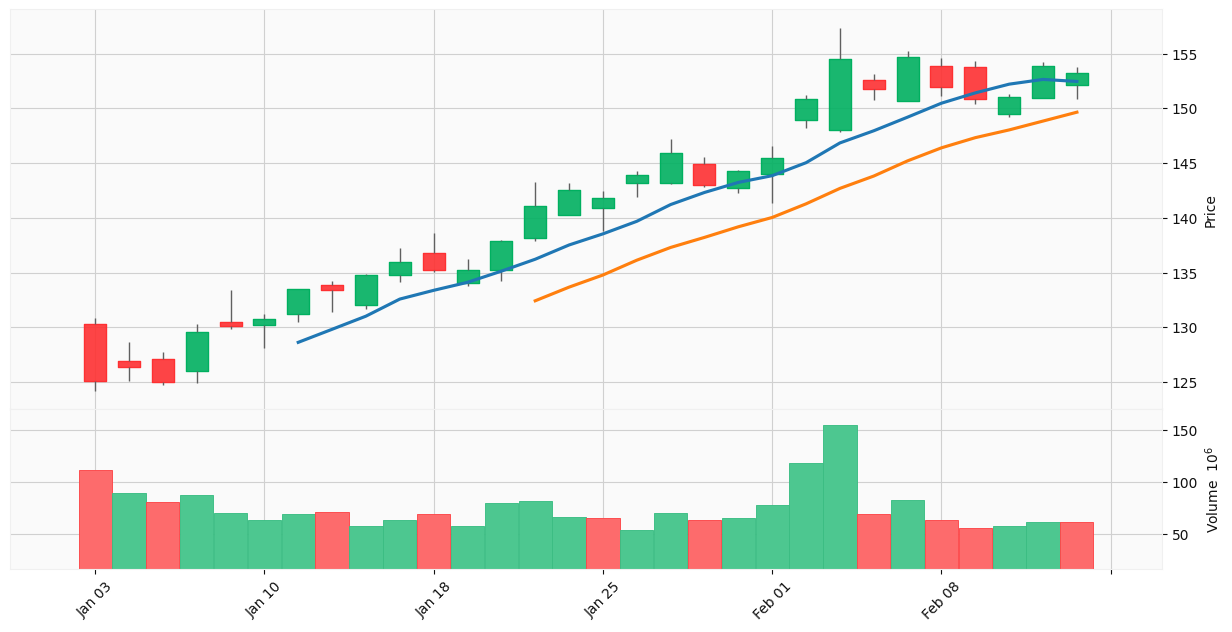

In [56]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

## Gráfico interativo

Para criarmos um gráfico interativo primeiramente renomeamos nossas colunas

In [57]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_ajust', 'Volume']
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_ajust,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166634,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


Em seguida criamos um outro DataFrame que contem as primiras 60 linhas do nosso DataFrame inicial.

Criamos mais três colunas, uma para a data e as outras duas para as médias móveis de 7 e 14 dias

In [58]:
df = dados.head(60).copy()
df['Data'] = df.index
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()



In [59]:

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False, 
                  width=1100, height=600)

fig.show()